In [157]:
#importing Libraries required

import nltk, re, pprint
from nltk import word_tokenize
from urllib import request
from nltk import sent_tokenize
from nltk.corpus import stopwords
import numpy as np
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem.porter import PorterStemmer
from nltk.collocations import *

In [188]:
count_vect = CountVectorizer(max_features=1000)
X_train_counts = (count_vect.fit_transform(df)).toarray()

In [189]:
from sklearn.cluster import KMeans
wcss = [] # list of interia values at each "k" cluster trial (within cluster sum of squared errors, wcss)
n_clusters = list(range(2,8)) # finding optimal "k" clusters out of 10 possible clusters trials
for i in n_clusters:
    kmeans = KMeans(n_clusters=i,random_state=42,init='k-means++')
    kmeans.fit(X_train_counts)
    wcss.append(kmeans.inertia_)

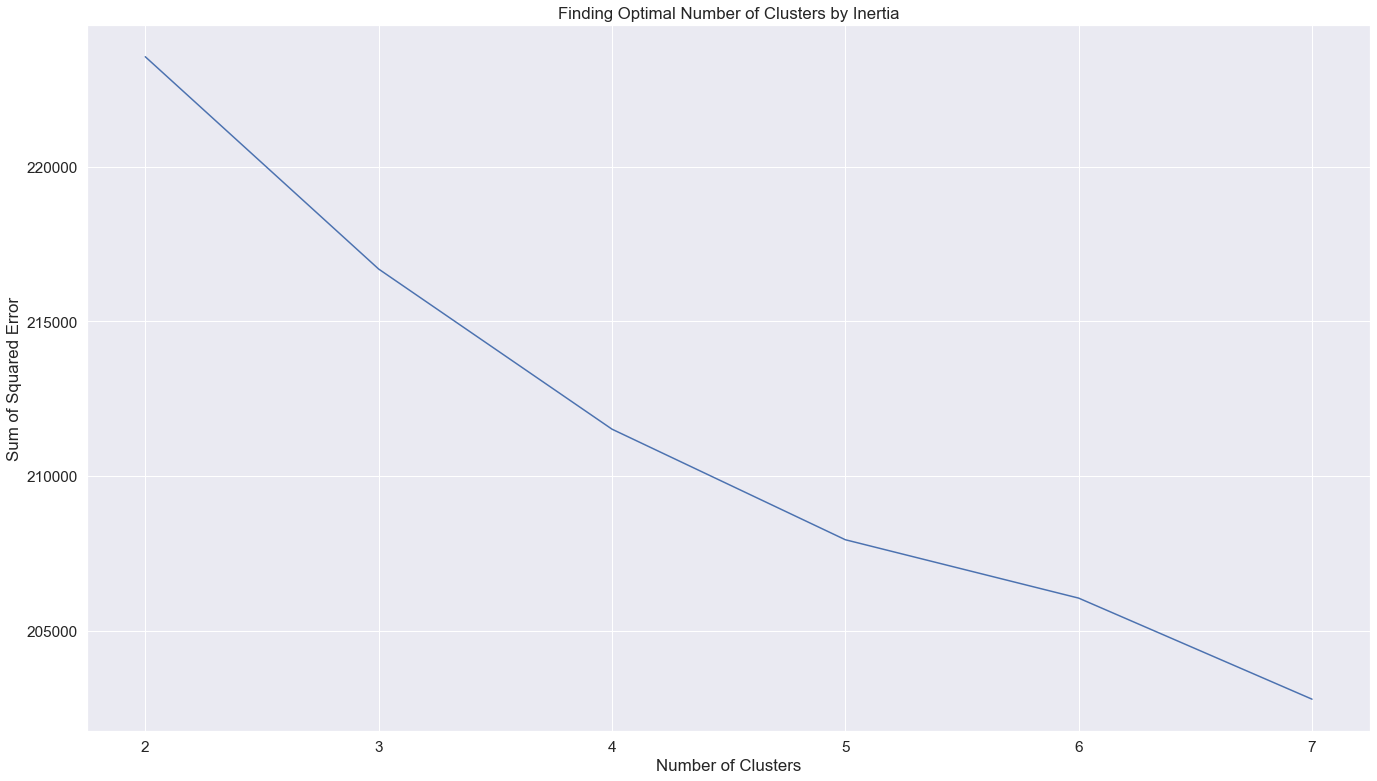

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (23,13)
plt.plot(n_clusters,wcss)
plt.title("Finding Optimal Number of Clusters by Inertia")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.xticks(n_clusters)
plt.show()

In [191]:
km = KMeans(n_clusters=7, verbose=0, random_state=20,n_init=1, max_iter=50,init='k-means++')
km.fit(X_train_counts)
y_cluster_kmeans = km.predict(X_train_counts)
score1 = silhouette_score (X_train_counts, y_cluster_kmeans, metric='euclidean')
print("Silhoutte_score of k-means BOW:",score1)
kappa4 = cohen_kappa_score(Label,y_cluster_kmeans,weights='linear')
print("Kappa of k-means BOW:",kappa4)
from sklearn.metrics.cluster import adjusted_rand_score
rand4=adjusted_rand_score(Label, y_cluster_kmeans)

Silhoutte_score of k-means BOW: 0.03960109857187424
Kappa of k-means BOW: -0.24302331386351161


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.27752056783583695
For n_clusters = 3 The average silhouette_score is : 0.0961692377822096
For n_clusters = 4 The average silhouette_score is : 0.0962649977479517
For n_clusters = 5 The average silhouette_score is : 0.10328549080141812
For n_clusters = 6 The average silhouette_score is : 0.10609273756463826
For n_clusters = 7 The average silhouette_score is : 0.10689902789320196


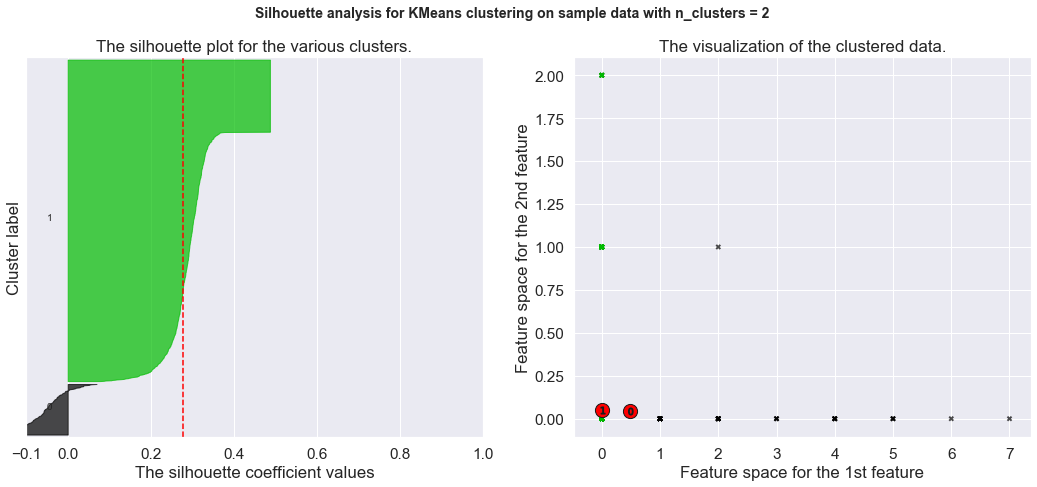

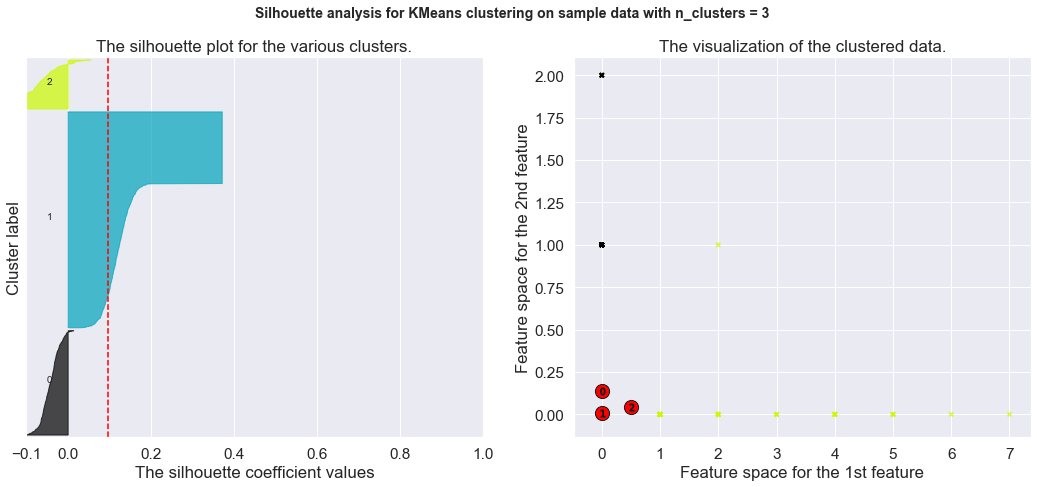

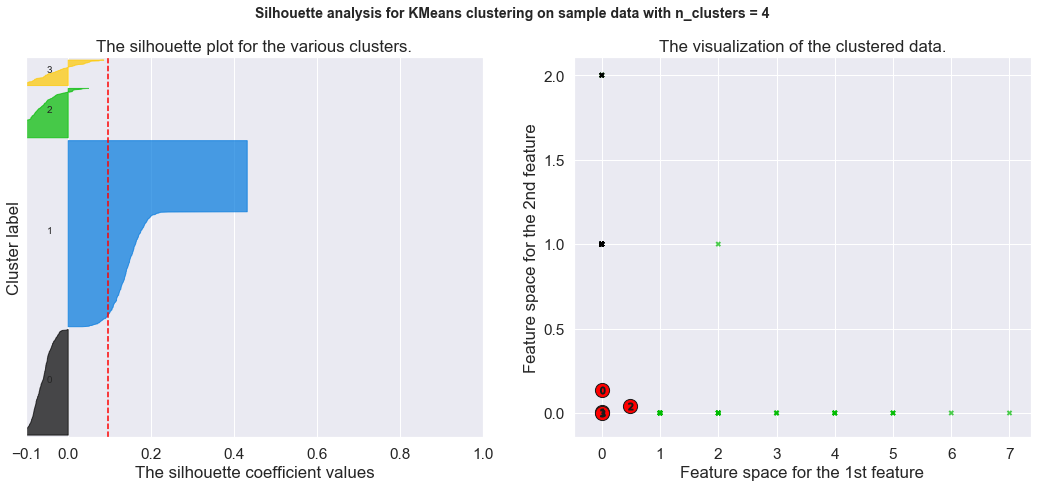

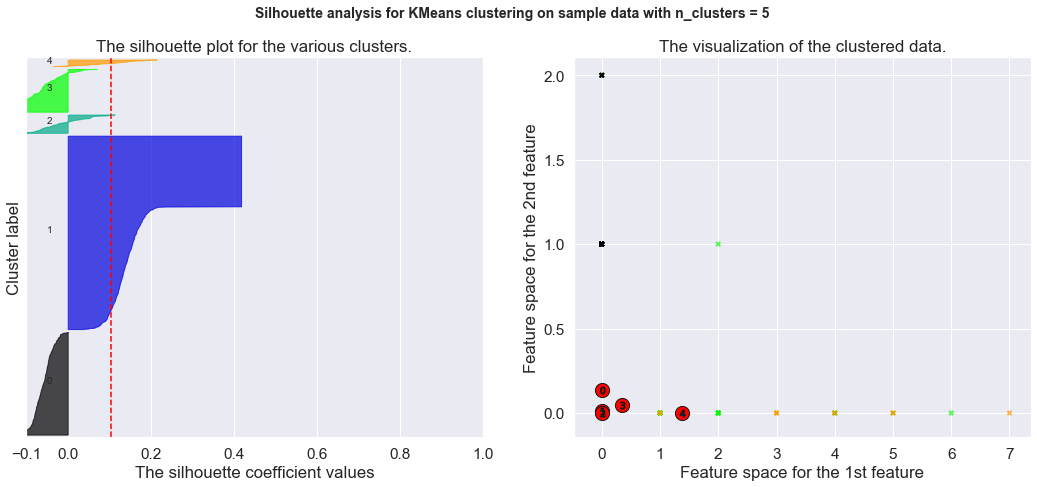

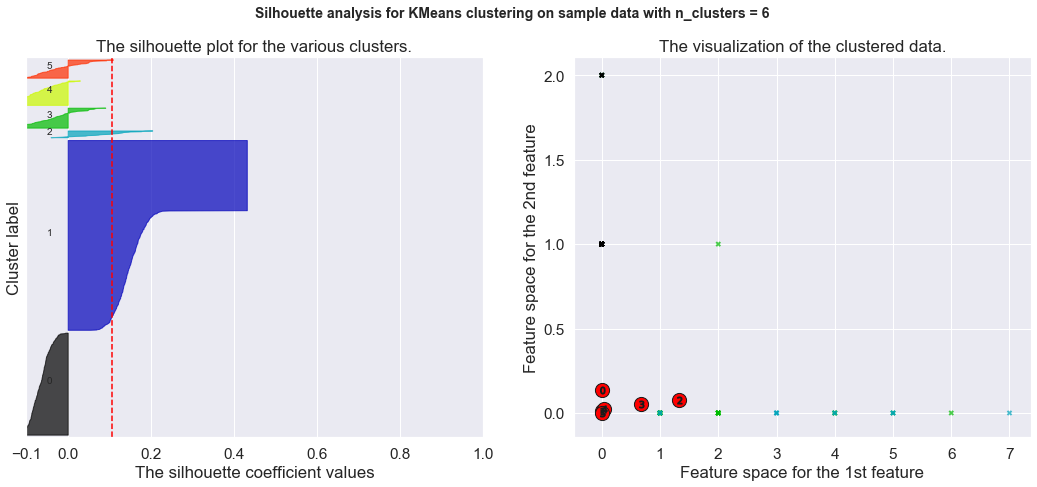

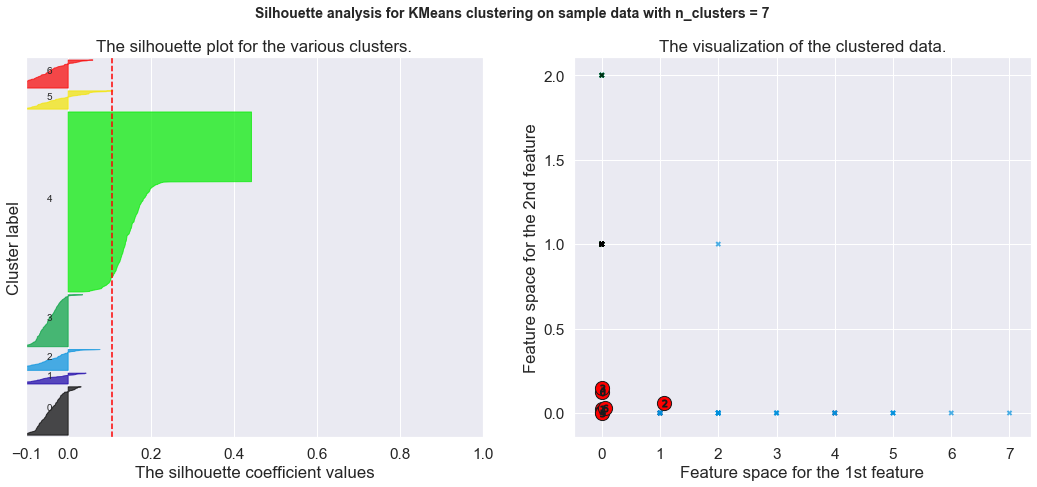

In [192]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_train_counts) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_train_counts)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_train_counts, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_counts, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_train_counts[:, 0], X_train_counts[:, 1], marker='X', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="Red", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [193]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering( linkage='average', n_clusters=8)
clustering.fit(X_train_counts)
labels_AGG1=clustering.labels_
#y_cluster_AGG = clustering.predict(tfidf_matrix)
score_AGG1 = silhouette_score (X_train_counts, labels_AGG1, metric='euclidean')
print("Silhoutte_score of AgglomerativeClustering BOW:",score_AGG1)
kappa5=cohen_kappa_score(Label,labels_AGG1,weights='linear')
print("Kappa of AgglomerativeClustering BOW:",kappa5)
from sklearn.metrics.cluster import adjusted_rand_score
rand5=adjusted_rand_score(Label, labels_AGG1)*100

Silhoutte_score of AgglomerativeClustering BOW: 0.3224083319309748
Kappa of AgglomerativeClustering BOW: -0.005438659058487838


In [194]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=8, random_state=10).fit(X_train_counts)
labels_gmm1=gmm.predict(X_train_counts)
score_gmm1 = silhouette_score (X_train_counts, labels_gmm1, metric='euclidean')
print("Silhoutte_score of GaussianMixture BOW:",score_gmm1)
kappa6=cohen_kappa_score(Label,labels_gmm1,weights='linear')
print("Kappa of GaussianMixture BOW:",kappa6)
from sklearn.metrics.cluster import adjusted_rand_score
rand6=adjusted_rand_score(Label, labels_gmm1)

Silhoutte_score of GaussianMixture BOW: 0.11760478469616666
Kappa of GaussianMixture BOW: 0.004315770544866093
